# SNPs + vertical transmission: Sobol sensitivity analysis

In [1]:
from SALib.sample import saltelli, fast_sampler
import pandas as pd
from Sensitivity import Sensitivity
import joblib
model_path = "../models/BMI-SNP/"
output_path = "../output/data/"
plots_path = "../output/plots/"

In [2]:
# parameter dictionary
problem = {
    'num_vars': 4,
    'names': ['random-mating', 'genetic-variance', 'vertical-trans-variance', 'fertility-differential'],
    'bounds': [[0, 1.0],
               [0, 0.20],
               [0, 0.20], 
               [0, 0.30]]
}

In [3]:
sample_parameters = False
if (sample_parameters):
    param_values = saltelli.sample(problem, 2**11)
    t = pd.DataFrame(param_values)
    t.columns = ['random-mating', 'genetic-variance', 'vertical-trans', 'fertitlity-differential']
    t.to_csv(model_path + "data/param-snp-vt-sobol-test.csv", index=False)
else:
    t = pd.read_csv(model_path + "data/param-snp-vt-sobol-test.csv")

In [4]:
# read data
df = pd.read_csv(output_path + "results-snp-vt-sobol-test.csv", sep = ";")
print(df.shape)
cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)
colnames = ['g'+str(i+1) for i in range(4)]
cols.columns = colnames
cols = cols[colnames].apply(pd.to_numeric)
df = pd.concat([df, cols], axis=1, ignore_index=False)
params = pd.read_csv(output_path + "param-snp-vt-sobol-test.csv", sep = ";")
df = df.merge(params, on = ["iteration", "replicate"])
df["iteration"] = pd.to_numeric(df["iteration"])
df = df.sort_values(by=['iteration'])
df = df.loc[df["iteration"] <= len(t),:]

# select parameters
vars = ['p_vertical_trans_variance', 'p_random_mating', 'p_genetic_variance']
X = df.loc[:,vars]

(20480, 13)


/var/folders/36/wsfqn0_j2ng6r0b58wc559fc0000gn/T/ipykernel_27143/4102813611.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)


In [5]:
params.head()

iteration  iteration_exp  replicate  init_pop fertility_type mating_type  \
0          1              1          1      8000       additive    logistic   
1         10             10          1      8000       additive    logistic   
2        100            100          1      8000       additive    logistic   
3       1000           1000          1      8000       additive    logistic   
4      10000          10000          1      8000       additive    logistic   

   p_genetic_variance  p_vertical_trans_variance  p_leakage  p_random_mating  \
0            0.062744                   0.146826        0.1         0.000732   
1            0.147119                   0.185303        0.1         0.319580   
2            0.084619                   0.022803        0.1         0.257080   
3            0.076807                   0.058740        0.1         0.577393   
4            0.078174                   0.042920        0.1         0.648682   

   p_fertility_factor  
0            0.224048  
1            0.126782  
2            0.033032  
3            0.213501  
4            0.255981

## Proportion obese

                               ST   ST_conf
random-mating            0.211233  0.023528
genetic-variance         0.519251  0.050075
vertical-trans-variance  0.287327  0.029123
fertility-differential   0.268577  0.028341
                               S1   S1_conf
random-mating            0.098638  0.027308
genetic-variance         0.329499  0.042555
vertical-trans-variance  0.166612  0.033696
fertility-differential   0.145716  0.029536
                                                         S2   S2_conf
(random-mating, genetic-variance)                  0.047779  0.055941
(random-mating, vertical-trans-variance)           0.025471  0.049554
(random-mating, fertility-differential)            0.025609  0.047074
(genetic-variance, vertical-trans-variance)        0.060057  0.063777
(genetic-variance, fertility-differential)         0.067711  0.067023
(vertical-trans-variance, fertility-differential)  0.020428  0.053693


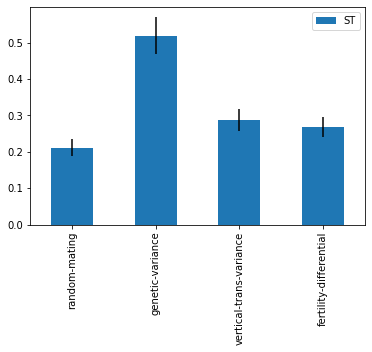

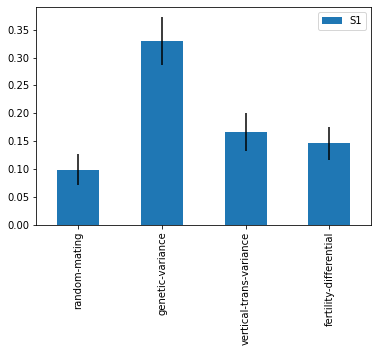

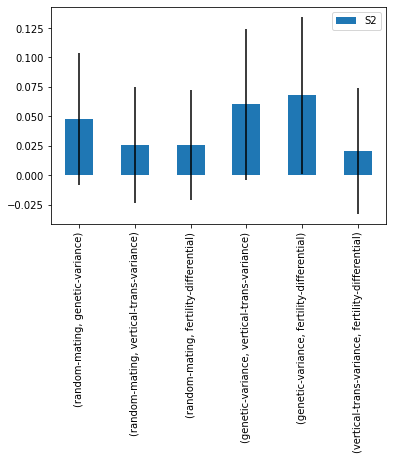

In [6]:
sb = Sensitivity(problem, df['g4'], X)
sb.score('sobol')
sb.plot(save=True, filepath= plots_path + 'snp-vt-sobol-prop-obese.pdf',
    move=True, moving_path= '../manuscript/plots/')
sb.plot3D(labels={'outcome':'obese', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})
sav = {
    'sb_obese_s1': sb.tabval('S1'),
    'sb_obese_s2': sb.tabval('S2'),
    'sb_obese_st': sb.tabval('ST')
}

## Average BMI

                               ST   ST_conf
random-mating            0.186040  0.020172
genetic-variance         0.508448  0.045561
vertical-trans-variance  0.244030  0.025674
fertility-differential   0.310185  0.035323
                               S1   S1_conf
random-mating            0.089414  0.026408
genetic-variance         0.345055  0.037277
vertical-trans-variance  0.142137  0.028219
fertility-differential   0.190828  0.028276
                                                         S2   S2_conf
(random-mating, genetic-variance)                  0.038990  0.047399
(random-mating, vertical-trans-variance)           0.020885  0.046293
(random-mating, fertility-differential)            0.023787  0.042060
(genetic-variance, vertical-trans-variance)        0.045873  0.054285
(genetic-variance, fertility-differential)         0.066510  0.056898
(vertical-trans-variance, fertility-differential)  0.022632  0.043818


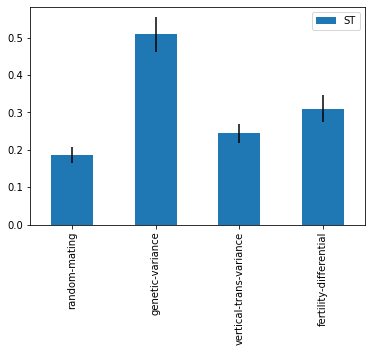

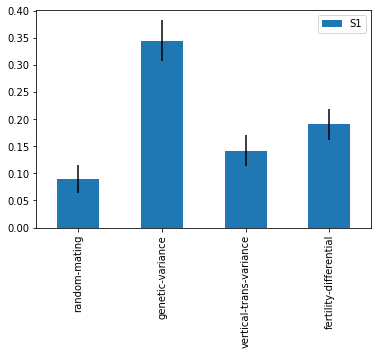

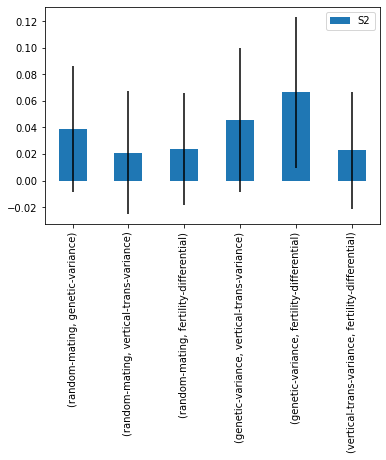

In [7]:
sb = Sensitivity(problem, df['average_bmi'], X)
sb.score('sobol')
sb.plot(save=True, filepath= plots_path + 'snp-vt-sobol-average-bmi.pdf',
    move=True, moving_path= '../manuscript/plots/')
sb.plot3D(labels={'outcome':'avearge bmi', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})

sav['sb_average_s1'] =  sb.tabval('S1')
sav['sb_average_s2'] =  sb.tabval('S2')
sav['sb_average_st'] =  sb.tabval('ST')

## SD BMI

                               ST   ST_conf
random-mating            0.257740  0.037049
genetic-variance         0.444911  0.040491
vertical-trans-variance  0.527639  0.059838
fertility-differential   0.124201  0.024105
                               S1   S1_conf
random-mating            0.127549  0.029851
genetic-variance         0.299040  0.039008
vertical-trans-variance  0.352158  0.041599
fertility-differential   0.012133  0.019494
                                                         S2   S2_conf
(random-mating, genetic-variance)                  0.011334  0.051432
(random-mating, vertical-trans-variance)           0.031943  0.053343
(random-mating, fertility-differential)           -0.001008  0.046377
(genetic-variance, vertical-trans-variance)        0.046533  0.058465
(genetic-variance, fertility-differential)         0.003561  0.060525
(vertical-trans-variance, fertility-differential)  0.034098  0.060334


['sobol-snp-vt.pkl']

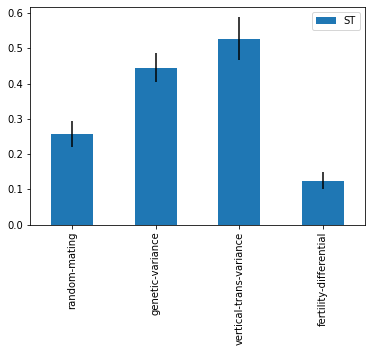

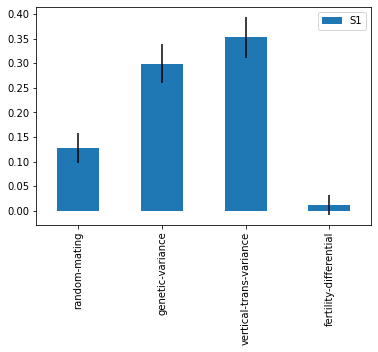

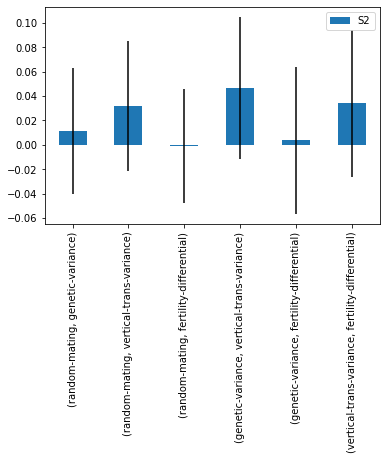

In [8]:
sb = Sensitivity(problem, df['sd_bmi'], X)
sb.score('sobol')
sb.plot(save=True, filepath= plots_path + 'snp-vt-sobol-sd-bmi.pdf',
    move=True, moving_path= '../manuscript/plots/')
sb.plot3D(labels={'outcome':'avearge bmi', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})

sav['sb_sd_s1'] =  sb.tabval('S1')
sav['sb_sd_s2'] =  sb.tabval('S2')
sav['sb_sd_st'] =  sb.tabval('ST')

# save output
v = sb.createRows(sav, g=['s1', 's2', 'st'])
joblib.dump(v, 'sobol-snp-vt.pkl')